In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import subprocess
import shlex
# My module
import gen_rand
from fileinput import close

print("START")

START


### Random sets generation

In next three cells we are going:
*  Compile C++ code using comp.sh script
*  Make array of sets with random integers
*  Run binary using sets as arguments and save amount of duplicates in <i>'temp.txt'</i>

Setup random generator:
*  <b>start</b> : number of elements for the shortest first set (min>=3)
*  <b>stop</b> : number of elements for the longest last set (max<=1001). Limited with number of arguments of binary file
*  <b>step</b> : increment from <i>start</i> to <i>stop</i>

In [2]:
!sh comp.sh;

start = 3
stop  = 1001
step  = 1

In [3]:
Obj1 = gen_rand.Rand_set(start, stop, step)
rand_arr = Obj1.gen_rand_prnt(ret=1)
del(Obj1)
print("Number of sets : ", rand_arr.shape[0])

Number of sets :  998


In [4]:
!rm -f size_dup.txt;
!echo "Len Dup" >> size_dup.txt;

with open('size_dup.txt', "a") as outfile:
    for i in rand_arr:
        t = np.array2string(np.array(list(i)))[1:-1]
        t = "./gen_bi_tree " + t
        t = shlex.split(t)
        subprocess.run(t, stdout=outfile)

outfile.close()
del(outfile)
del(rand_arr)
del(t)
del(i)

!wc -l size_dup.txt;

     999 size_dup.txt


### Dataframe

Working with data:
*  Make dataframe(df) from 'size_dup.txt' file
*  Add one more column to df with percentage of duplicates in input
*  Print four drawings :
    * Number of inputs vs amount of duplicates
    * Number of inputs vs percentage of duplicates
    * Percentage histogram
    * Derivative of duplicates

In [5]:
dDup = pd.read_table("size_dup.txt", delimiter=" ", index_col=False)
dDup['Perc'] = (dDup['Dup'] / dDup['Len']) * 1000
dDup['Perc'] = dDup['Perc'].astype(int) / 10
dDup['Der'] = dDup['Dup'].diff() # / step
dDup['d_Perc'] = dDup['Perc'].diff()
dDup.tail(5)

,Len,Dup,Perc,Der,d_Perc
993,996,26,2.6,-1.0,-0.1
994,997,25,2.5,-1.0,-0.1
995,998,24,2.4,-1.0,-0.1
996,999,23,2.3,-1.0,-0.1
997,1000,22,2.2,-1.0,-0.1


### Visualization 1

*  <b>Fig 1</b> : Graphic showing amount of duplicates vs length of inputs.
*  <b>Fig 2</b> : Graphic showing percentage of duplicates vs length of inputs.
*  <b>Fig 3</b> : Graphic showing how often we meet duplicates.
*  <b>Fig 4</b> : Graphic showing how changes (derivative) amount of duplicates with growing amount of inputs.

<AxesSubplot:xlabel='Len'>

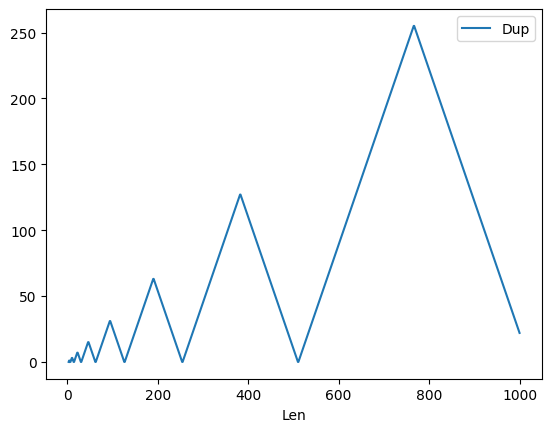

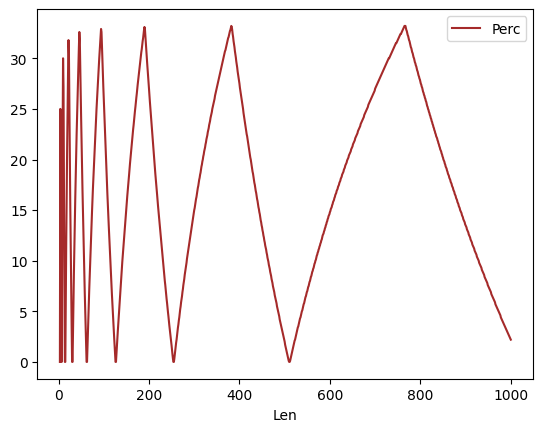

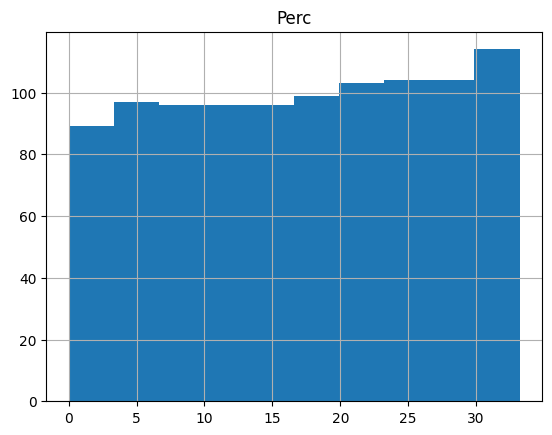

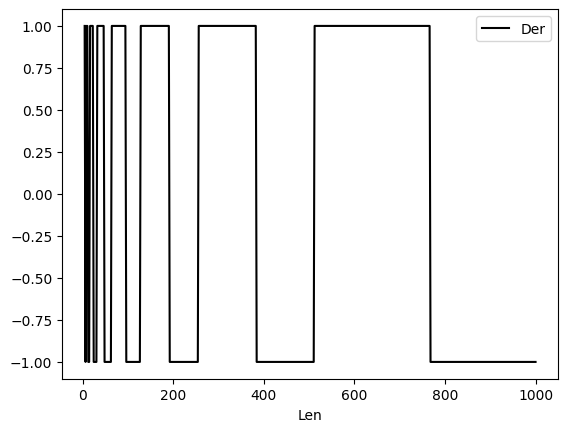

In [6]:
dDup.plot(x='Len', y='Dup')
dDup.plot.line(x='Len', y='Perc', color='brown')
dDup.hist(column='Perc')
dDup.plot.line(x='Len', y='Der', color='black')

### Critical points

We will examine my set-to-tree algorithm for local extremas. <br>
To find local minimums we will find points in which $f'(Len)≤0$ and $f'(Len+1)>0$  <br>
To find local maximums we will find points in which $ƒ'(Len)≥0$ and $ƒ'(Len+1)<0$

In [7]:
dDup['Der_Nxt'] = dDup['Der'].shift(-1)
dfMin = dDup[(dDup['Der'] <= 0) & (dDup['Der_Nxt'] > 0)]
dfMin = dfMin.reset_index(drop=True)
dfMin.index += 1
print("Number of local mins :", dfMin.shape[0])
dfMin['Min_Range'] = dfMin['Len'].diff()
dfMin.tail(10)

Number of local mins : 7


,Len,Dup,Perc,Der,d_Perc,Der_Nxt,Min_Range
1,7,0,0.0,0.0,0.0,1.0,NaN
2,15,0,0.0,0.0,0.0,1.0,8.0
3,31,0,0.0,0.0,0.0,1.0,16.0
4,63,0,0.0,0.0,0.0,1.0,32.0
5,127,0,0.0,0.0,0.0,1.0,64.0
6,255,0,0.0,0.0,0.0,1.0,128.0
7,511,0,0.0,0.0,0.0,1.0,256.0


In [8]:

dfMax = dDup[(dDup['Der'] >= 0) & (dDup['Der_Nxt'] < 0)]
dfMax = dfMax.drop(columns=['Der_Nxt'])
dfMax = dfMax.reset_index(drop=True)
dfMax.index += 1
print("Number of local maxs :", dfMax.shape[0])
dfMax['Max_Range'] = dfMax['Len'].diff()
dfMax.tail(10)

Number of local maxs : 8


,Len,Dup,Perc,Der,d_Perc,Max_Range
1,5,1,20.0,0.0,-5.0,NaN
2,11,3,27.2,0.0,-2.8,6.0
3,23,7,30.4,0.0,-1.4,12.0
4,47,15,31.9,0.0,-0.7,24.0
5,95,31,32.6,0.0,-0.3,48.0
6,191,63,32.9,0.0,-0.2,96.0
7,383,127,33.1,0.0,-0.1,192.0
8,767,255,33.2,0.0,0.0,384.0


### Min-Max frequency

We will observe case with <i>start=3 ; stop=1001; step=1</i>.<br>
<br>
How its seen, local minimum could be found : $ƒ(x)=2^{x+2}-1$ ; $x ∈ N$; <br>
Local maximum could be found : $ƒ(x)=2+3*\sum_{k=1}^{x}2^{k-1}$ ; $x ∈ N$;

In [9]:
# Memory clean up
del(dDup)
del(dfMin)
del(dfMax)
!rm -f size_dup.txt;

### Semi-conclusion

My algorithm, converting vector to the Binary Tree, is very unoptimized. As we see, there are a lot of duplicates. Fortunately, there are no more than two same numbers in the tree, and all duplicated numbers are leaves. There will not be a problem to clean up the tree from duplicated numbers.

This algorithm does not have constant complexity, and the amount of duplicates changes linearly with increasing number of inputs. 

You can find implementation in <i>bi_tree.h</i> in <i><b>tb_node* gen_triple(int* iarr, int start, int finish);</b></i> function. Deleting of duplicates could be found in <i>bi_tree.h</i> in <i><b>void del_dup(T *root, Y *out);</b></i> function.

With next steps you will see how I work with the Binary Tree Class.